### PCA from scratch

Number of samples: 150
Number of features: 4


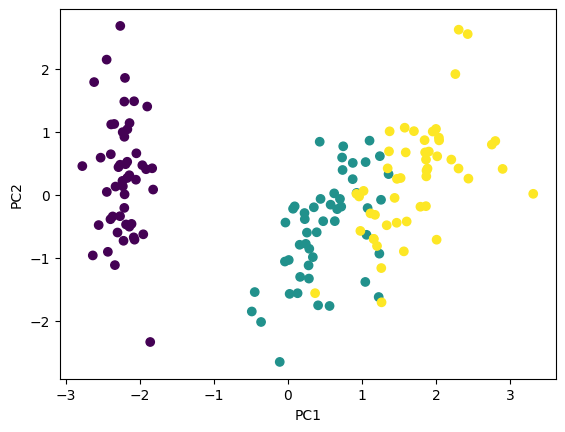

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

def PCA_numpy(X,y):
    def mean(x): # np.mean(X, axis = 0)  
        return sum(x)/len(x)  

    def std(x): # np.std(X, axis = 0)
        return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

    def Standardize_data(X):
        return (X - mean(X))/std(X)

    def covariance(x): 
        return (x.T @ x)/(x.shape[0]-1)

    # Step 1: Standardize the data
    X_std = Standardize_data(X)
    # Step 2: Find the covariance matrix
    cov_mat = covariance(X_std) # np.cov(X_std.T)

    # Step 3: Find the eigenvectors and eigenvalues of the covariance matrix
    eig_vals, eig_vecs = eig(cov_mat) 

    max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
    signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
    eig_vecs = eig_vecs*signs[np.newaxis,:]
    eig_vecs = eig_vecs.T

    # Step 4: Rearrange the eigenvectors and eigenvalues 
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

    # Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_vals_sorted = np.array([x[0] for x in eig_pairs])
    eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
    
    # Step 5: Choose principal components
    k = 2
    W = eig_vecs_sorted[:k, :] # Projection matrix

    # Step 6: Project the data
    X_proj = X_std.dot(W.T)

    return X_proj

X_proj = PCA_numpy(X,y)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
path="/home/suzy/gitrepos/tuttelikz/machine-learning/221210-pca/images/pca_scratch.png"
plt.savefig(path, dpi=300)
plt.show()

Everything ok!


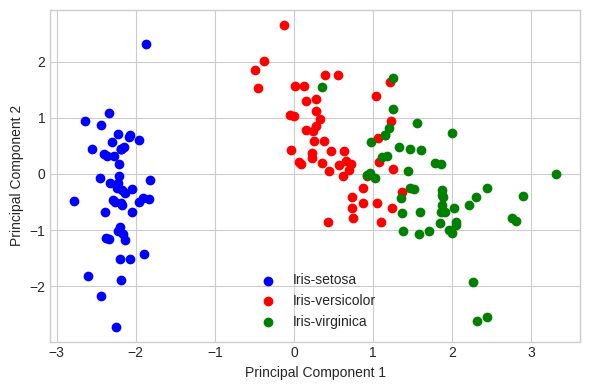

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

# Norm
X_std = StandardScaler().fit_transform(X)

# Eigenval
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

# decompos
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# eigendecompos of std data
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

# eigendecompos of raw data
cor_mat2 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

# assert

# make list of pairs
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

# new feature space
Y = X_std.dot(matrix_w)

# plot
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


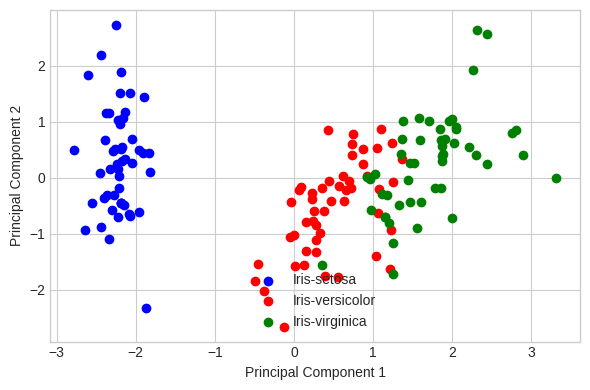

In [30]:
# In sklearn
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

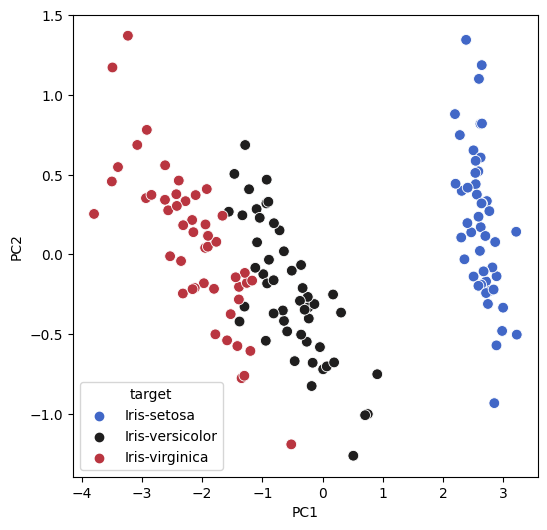

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def PCA(X , num_components):
	#Step-1
	X_meaned = X - np.mean(X , axis = 0)

	#Step-2
	cov_mat = np.cov(X_meaned , rowvar = False)

	#Step-3
	eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

	#Step-4
	sorted_index = np.argsort(eigen_values)[::-1]
	sorted_eigenvalue = eigen_values[sorted_index]
	sorted_eigenvectors = eigen_vectors[:,sorted_index]

	#Step-5
	eigenvector_subset = sorted_eigenvectors[:,0:num_components]

	#Step-6
	X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose()).transpose()

	return X_reduced

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

In [20]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)


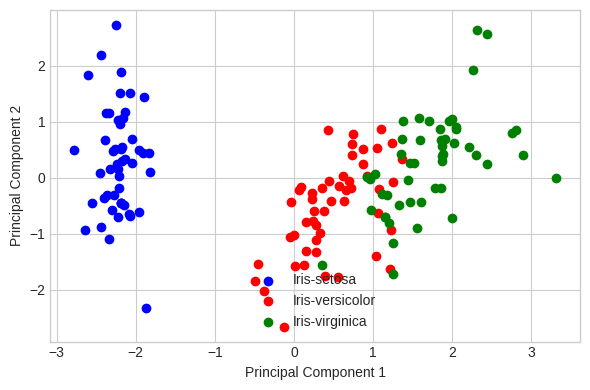

In [25]:
cor_mat2 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[target==lab, 0],
                    Y_sklearn[target==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

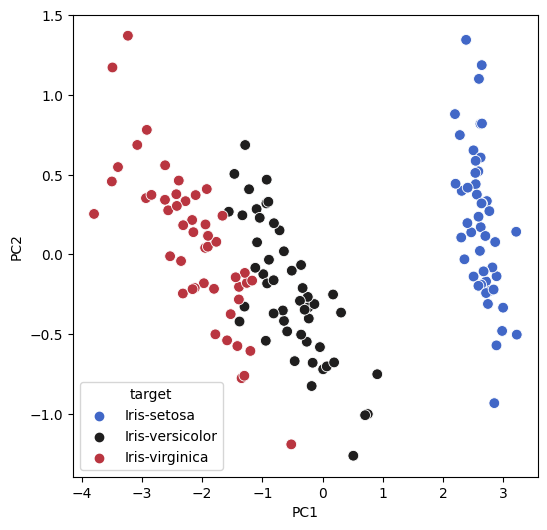

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

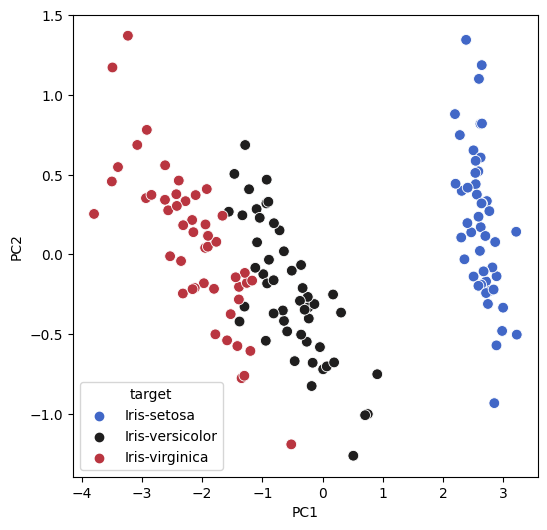

In [ ]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
iris=pd.read_csv('iris.csv')
print(iris.head())
#sns.pairplot(iris)
colors = ["#ff0000", "#01ff00", "#0000ff"]# Set your custom color palette
sns.pairplot(iris, hue="variety", palette=colors, markers=["s", "^", "o"])
path="/home/suzy/gitrepos/tuttelikz/machine-learning/221210-pca/images/pairplot_iris.png"
plt.savefig(path, dpi=300)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [ ]:
np.random.seed(0)
path="/home/suzy/gitrepos/tuttelikz/machine-learning/221210-pca/images/covariance_types.png"

def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

PARAMETERS = {
    'Positive covariance': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative covariance': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak covariance': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    #confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.savefig(path, dpi=300)
plt.show()


In [ ]:
import pylab as pl

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(pca.explained_variance_)
#colors = ["#ff0000", "#01ff00", "#0000ff"]
pl.figure()
for c, i, target_name in zip(["#ff0000", "#01ff00", "#0000ff"], [0, 1, 2], target_names):
   pl.scatter(X_r[y==i,0], X_r[y==i,1], c=c, label=target_name)
pl.legend()
pl.title('PCA of IRIS dataset')
path="/home/suzy/gitrepos/tuttelikz/machine-learning/221210-pca/images/pca_iris.png"
plt.savefig(path, dpi=300)
pl.show()

### PCA from scratch


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
#prepare the data
x = data.iloc[:,0:4]
#prepare the target
target = data.iloc[:,4]
#Applying it to PCA function
mat_reduced = PCA(x , 2)
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')